In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dominant colors in images

### Dominant colors in images
- All images consist of pixels
- Each pixel has three values: Red, Green and Blue
- Pixel color: combination of these RGB values
- Perform k-means on standardized RGB values to find cluster centers
- Uses: Identifying features in satellite images

### Tools to find dominant colors
- Convert image to pixels: matplotlib.image.imread
- Display colors of cluster centers: matplotlib.pyplot.imshow

### Convert image to RGB matrix

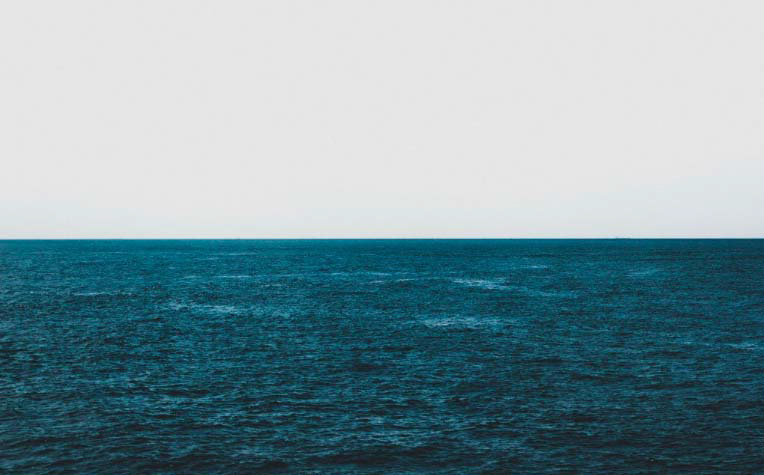

In [71]:
from IPython.display import Image
Image('sea.jpg')

In [35]:
import matplotlib.image as img
image = img.imread('sea.jpg')
image.shape

(475, 764, 3)

In [36]:
r = []
g = []
b = []

for row in image:
    for pixel in row:
        # A pixel contains RGB values
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [51]:
pixels = pd.DataFrame({'red': r, 'green': g, 'blue':b}, dtype='int16')
pixels.head()

,red,green,blue
0,230,230,230
1,230,230,230
2,230,230,230
3,230,230,230
4,230,230,230


In [53]:
from scipy.cluster.vq import whiten

pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_green'] = whiten(pixels['green'])
pixels['scaled_blue'] = whiten(pixels['blue'])

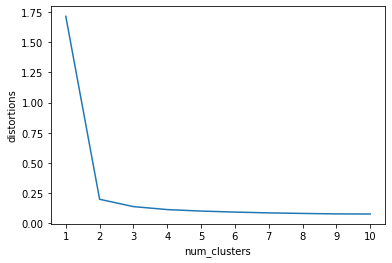

In [57]:
from scipy.cluster.vq import kmeans

distortions = []
num_clusters = range(1, 11)

# Create a list of distortions from the kmeans method
for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red', 'scaled_green', 'scaled_blue']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Find dominant colors

In [58]:
cluster_centers, distortion = kmeans(pixels[['scaled_red', 'scaled_green', 'scaled_blue']], 2)

In [66]:
colors = []

# Find Standard Deviations
r_std, g_std, b_std = pixels[['red', 'green', 'blue']].std()

# Scale actual RGB values in range of 0-1
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std/255,
        scaled_g * g_std/255,
        scaled_b * b_std/255
    ))

In [67]:
#Dimensions: 2 x 3 (N X 3 matrix)
print(colors)

[(0.08208878666577532, 0.28237723984933766, 0.34200118175036714), (0.8928688216892696, 0.8979744514522554, 0.8996725420036012)]


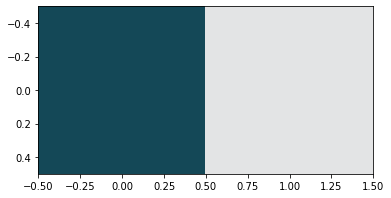

In [68]:
#Dimensions: 1 x 2 x 3 (1 X N x 3 matrix)
plt.imshow([colors])
plt.show()

### Exercise: Extract RGB values from image
There are broadly three steps to find the dominant colors in an image:

Extract RGB values into three lists.
Perform k-means clustering on scaled RGB values.
Display the colors of cluster centers.
To extract RGB values, we use the imread() function of the image class of matplotlib. Empty lists, r, g and b have been initialized.

For the purpose of finding dominant colors, we will be using the following image.

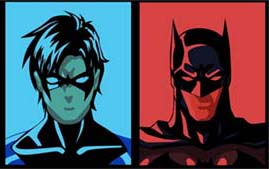

In [86]:
from IPython.display import Image
Image('batman.jpg')

In [97]:
r = []
g = []
b = []

# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

(169, 269, 3)


That is correct! You have successfully extracted the RGB values of the image into three lists, one for each color channel.

### Exercise: How many dominant colors?
We have loaded the following image using the imread() function of the image class of matplotlib.



The RGB values are stored in a DataFrame, batman_df. The RGB values have been standardized used the whiten() function, stored in columns, scaled_red, scaled_blue and scaled_green.

Construct an elbow plot with the DataFrame. How many dominant colors are present?

In [98]:
batman_df = pd.DataFrame({'red': r, 'green': g, 'blue':b}, dtype='int16')

In [99]:
from scipy.cluster.vq import whiten

batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_green'] = whiten(batman_df['green'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])

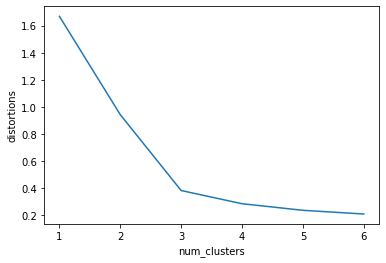

In [100]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_green', 'scaled_blue']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

You are right! Notice that there are three distinct colors present in the image, which is supported by the elbow plot.

### Exercise: Display dominant colors
We have loaded the following image using the imread() function of the image class of matplotlib.



To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: converted_pixel = standardized_pixel * pixel_std / 255

The RGB values are stored in a DataFrame, batman_df. The scaled RGB values are stored in columns, scaled_red, scaled_blue and scaled_green. The cluster centers are stored in the variable cluster_centers, which were generated using the kmeans() function with three clusters.

In [101]:
cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_green', 'scaled_blue']], 3)

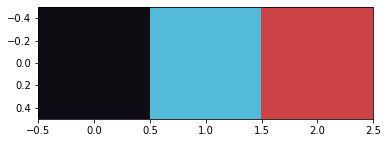

In [102]:
colors = []

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

That is correct! Notice the three colors resemble the three that are indicative from visual inspection of the image.